In [74]:
import numpy as np
from scipy.io import loadmat
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt


In [75]:
# Method for getting dataset from file
getData_LVQ = lambda: loadmat('lvqdata.mat')['lvqdata']

In [76]:
# given the assignment we know the actual labels
# first 50 are class 1, other 50 are class 2
actual_labels = np.array([1]*50 + [2]*50)
print(np.shape(actual_labels))

data = getData_LVQ()

print(np.shape(data))

(100,)
(100, 2)


In [106]:
def LVQ1(data:np.array, data_labels:np.array, K:int, learning_rate:float, epochs:int, init_prototypes:np.array = None, init_prototype_labels:np.array = None):
    N = len(data[0]) # number of features, dimensionality of data
    P = len(data) # number of data points

    if init_prototypes is None:
        # initialize each prototype by random selection of a data point from the corre-sponding class
        # make sure K prototypes from each class
        
        random_indices = []
        for label in np.unique(data_labels):
            label_indices = np.where(data_labels == label)[0]
            random_indices.extend(np.random.choice(label_indices, K, replace=False))
            
        prototypes = data[random_indices]
        prototypes_labels = data_labels[random_indices]
    else:
        prototypes = init_prototypes
        prototypes_labels = init_prototype_labels

    training_error = []

    for t in range(epochs):
        # random permutation is done on indexes instead of datapoints because its easier to handle
        random_indexes = np.random.permutation(range(P)) # random permutation of indexes
        n_missclassifications = 0 # track the number of missclassifications in this epoch
        for p_idx in random_indexes:
            x = data[p_idx]
            # find the closest prototype (winner)
            distances = cdist(data[[p_idx]] , prototypes, 'euclidean')[0]
            closest_prototype_index = np.argmin(distances)
            # update the winner according to winner-takes-all and if it was a missclassification
            if data_labels[p_idx] == prototypes_labels[closest_prototype_index]:
                prototypes[closest_prototype_index] = prototypes[closest_prototype_index] + learning_rate * (x - prototypes[closest_prototype_index])
            else:
                prototypes[closest_prototype_index] = prototypes[closest_prototype_index] - learning_rate * (x - prototypes[closest_prototype_index])
                n_missclassifications = n_missclassifications + 1

        # training error over epochs
        training_error.append(n_missclassifications/len(data))

    return (N, P, prototypes, prototypes_labels, training_error)


In [93]:
def plot_learning_curve(training_error:[],epochs:int):
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, epochs + 1), training_error, label='Misclassification', color='green')
    plt.xlabel('Epochs')
    plt.ylabel('Misclassification')
    plt.title('Learning curve')
    plt.legend()
    plt.grid(True)
    plt.show()


In [94]:
def plot_data(data:np.array,prototypes:[]):
    fig = plt.figure(figsize=(10, 8))
    plot = fig.add_subplot()
    plot.scatter(data[:, 0], data[:, 1], c="blue", marker='o', label='Data Points')
    plot.scatter(prototypes[:, 0], prototypes[:, 1], c="red", marker='o', label='Prototype vectors')
    plot.set_xlabel('X values')
    plot.set_ylabel('Y values')
    plot.set_title('Original data points')
    plt.legend(loc="upper left")
    plt.show()


In [100]:
def plotTrainingResult(data:np.array, prototypes:np.array, actual_labels:np.array, prototypes_labels:np.array):
    plt.figure(figsize=(8, 6))

    # plot the data points for each unique label
    for label in np.unique(actual_labels):
        plt.scatter(data[actual_labels == label][:, 0], 
                    data[actual_labels == label][:, 1], 
                    label=f'Data Class {label}')
        
    # plot the prototypes for each unique prototype label
    for label in np.unique(prototypes_labels):
        plt.scatter(prototypes[prototypes_labels == label][:, 0], 
                    prototypes[prototypes_labels == label][:, 1], 
                    marker='x', s=100, label=f'Prototype Class {label}')

    plt.title("Data with LVQ1 labels and prototype positions")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.legend()
    plt.grid(True)
    plt.show()

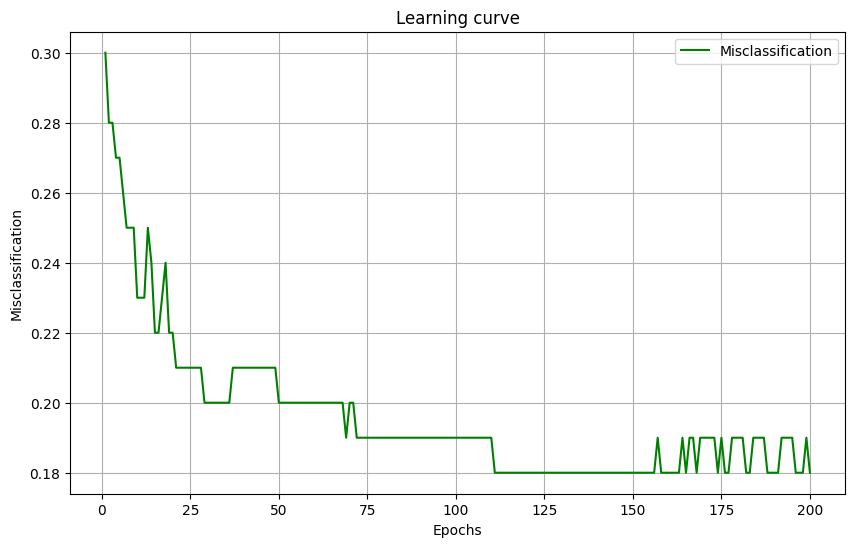

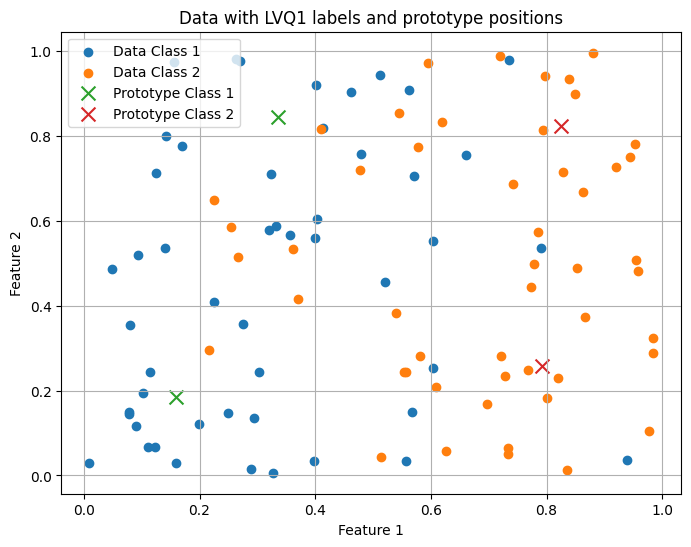

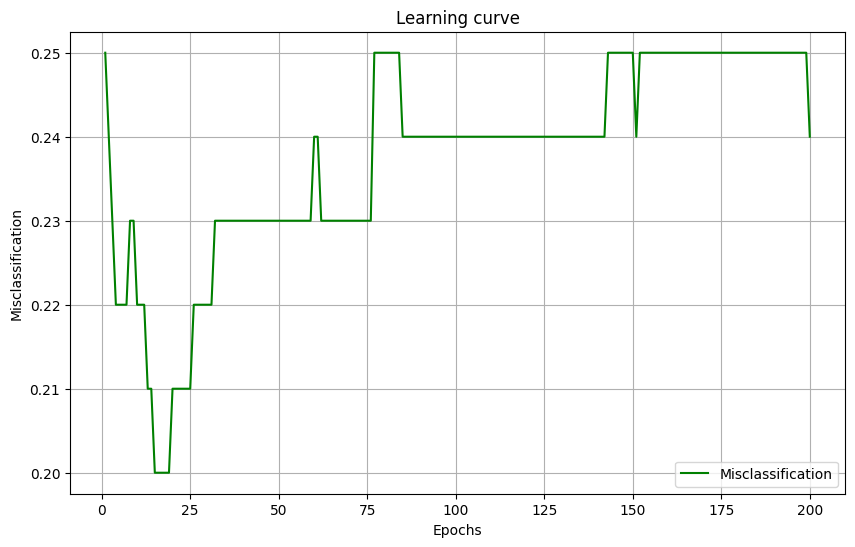

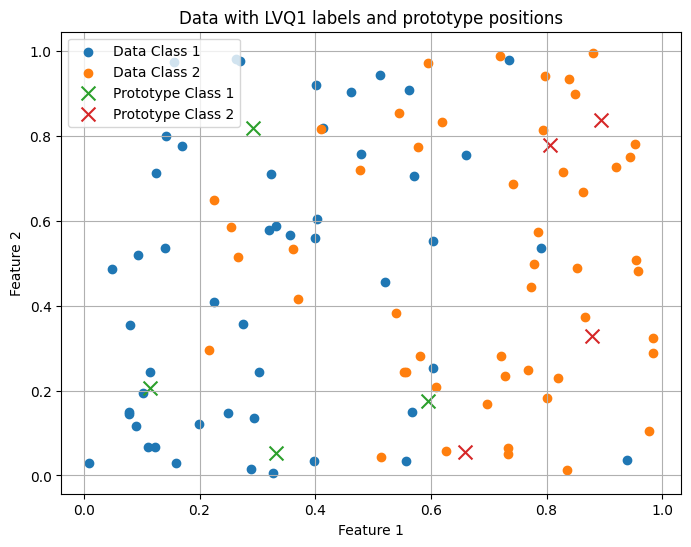

In [107]:

# results 5.2
# a) one prototype per class
n_labels = len(np.unique(actual_labels))
prototypes_per_class = 1
K = n_labels * prototypes_per_class
learning_rate =  0.002
epochs = 200
N,P,prototypes,prototypes_labels, training_error = LVQ1(data, actual_labels, K, learning_rate, epochs)

plot_learning_curve(training_error,epochs)
plotTrainingResult(data, prototypes, actual_labels, prototypes_labels)

# b) two prototypes per class
prototypes_per_class = 2
K = n_labels * prototypes_per_class
learning_rate =  0.002
epochs = 200
N,P,prototypes,prototypes_labels, training_error = LVQ1(data, actual_labels, K, learning_rate, epochs)
plot_learning_curve(training_error,epochs)
plotTrainingResult(data, prototypes, actual_labels, prototypes_labels)

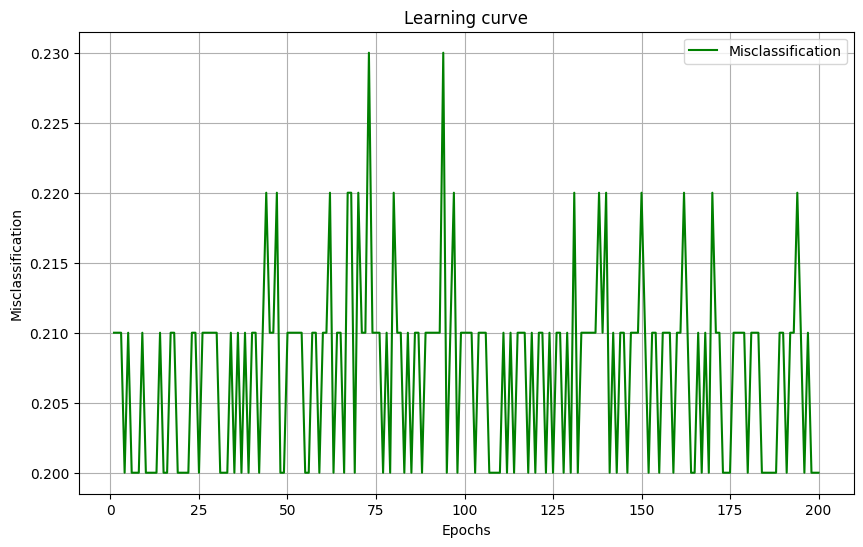

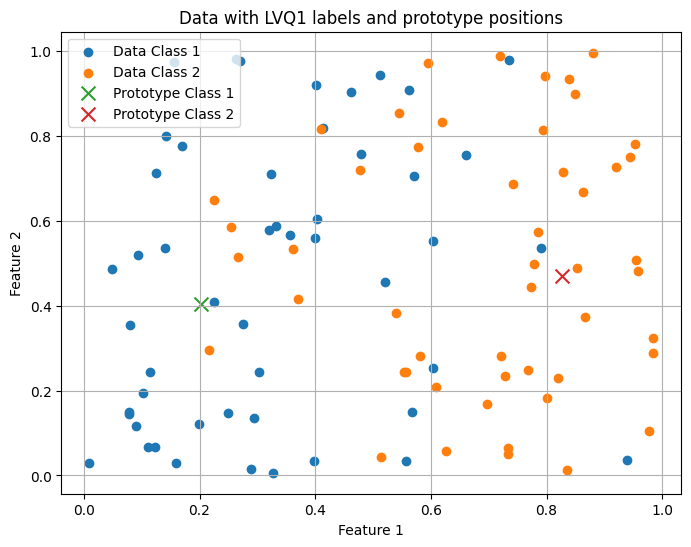

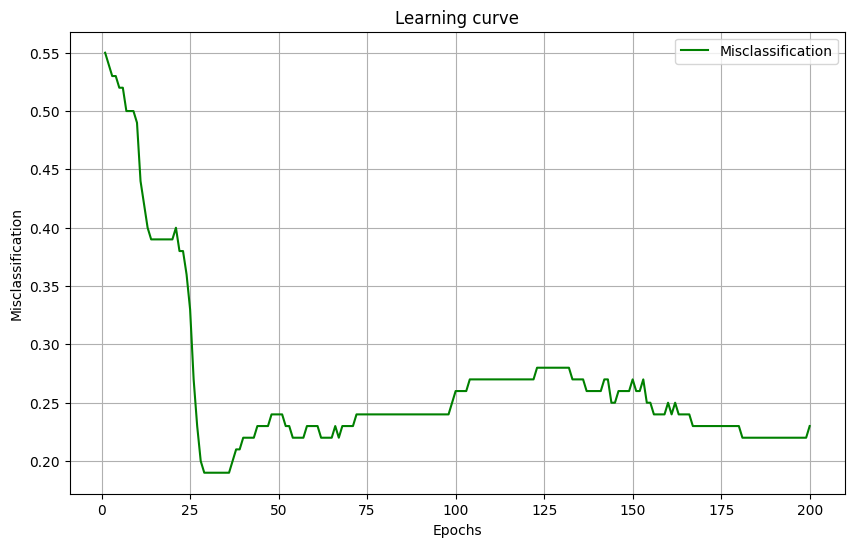

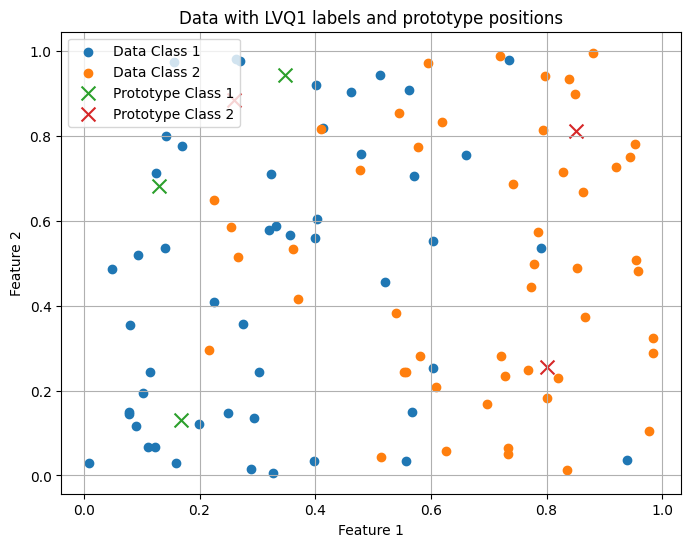

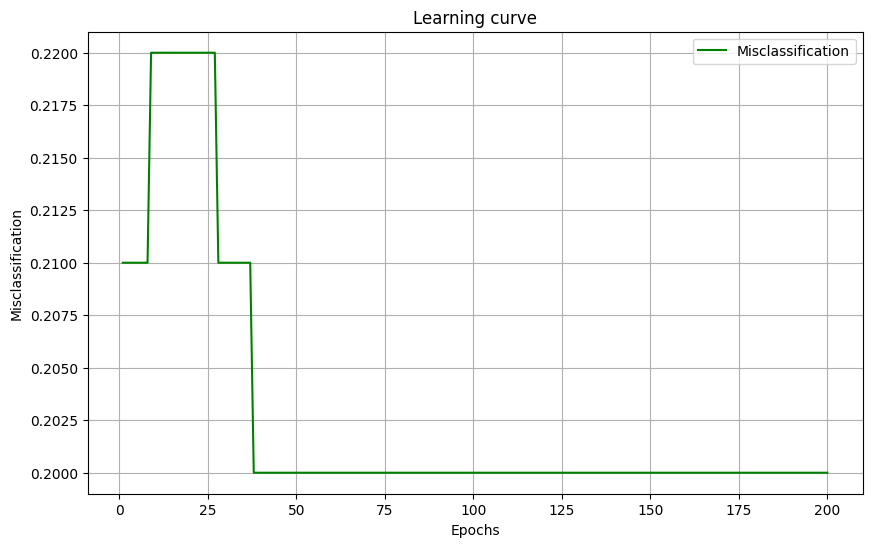

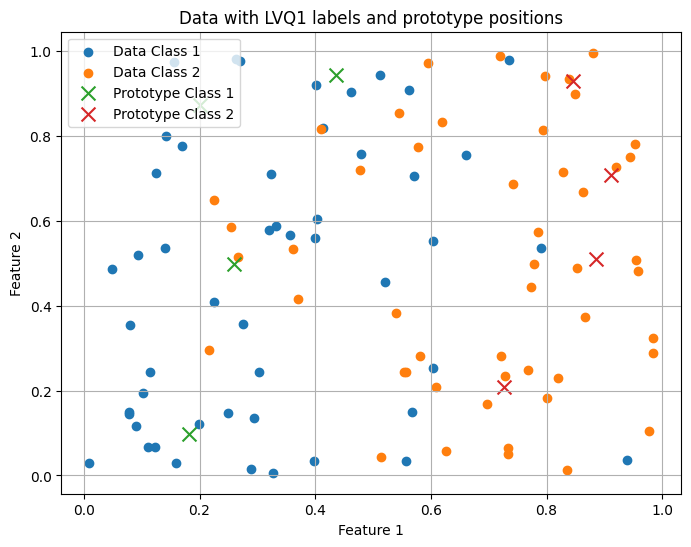

In [109]:
# bonus 1

# initialize prototypes in (or very close to) the class-conditional mean vectors and
# compare the learning curves with those of the random initialization

class_mean_vectors = []
init_prototype_labels = np.unique(actual_labels)
for label in init_prototype_labels:
    class_mean_vectors.append(np.mean(data[actual_labels == label], axis=0))
class_mean_vectors = np.array(class_mean_vectors)

# run 
prototypes_per_class = 1
learning_rate =  0.002
epochs = 200
N,P,prototypes,prototypes_labels, training_error = LVQ1(data, actual_labels, prototypes_per_class, learning_rate, epochs, class_mean_vectors, init_prototype_labels)

plot_learning_curve(training_error,epochs)
plotTrainingResult(data, prototypes, actual_labels, prototypes_labels)


# bonus 2

prototypes_per_class = 3
learning_rate =  0.002
epochs = 200
N,P,prototypes,prototypes_labels, training_error = LVQ1(data, actual_labels, prototypes_per_class, learning_rate, epochs)

plot_learning_curve(training_error,epochs)
plotTrainingResult(data, prototypes, actual_labels, prototypes_labels)

prototypes_per_class = 4
learning_rate =  0.002
epochs = 200
N,P,prototypes,prototypes_labels, training_error = LVQ1(data, actual_labels, prototypes_per_class, learning_rate, epochs)

plot_learning_curve(training_error,epochs)
plotTrainingResult(data, prototypes, actual_labels, prototypes_labels)